## Bandpass

In [10]:
import matplotlib.pyplot as plt

def plot_spectro(fs, input_amp):
    fig , ax = plt.subplots()
    ax.plot(fs, input_amp)
    ax.set_ylim(0, 2500)
    ax.set_xlim(0, 20000)
    plt.show()

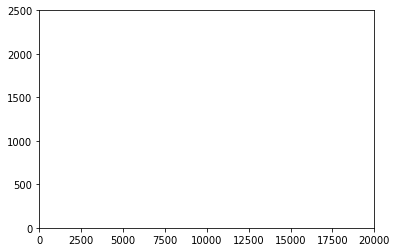

In [23]:
plot_spectro(1000, 1000)

In [2]:
from thinkdsp import Wave

def make_wave(hs, framerate):
    ys = np.fft.irfft(hs)
    
    return Wave(ys,None, framerate)

In [3]:
def band_pass(amplitudes, fs, low_cutoff, high_cutoff, factor):
    
    indices = (low_cutoff > abs(fs)) | (abs(fs) > high_cutoff)
    amplitudes[indices] *= factor
    
    return amplitudes

In [4]:
def reverb(amplitude, time_delay):

    time_in_freq = time_delay * 44100

    time_in_freq = int(time_in_freq)
    reverb_amp = np.pad(amplitude, time_in_freq)
    reverb_amp = reverb_amp[:len(amplitude)]
    
    reverbed_amplitudes = amplitude + reverb_amp
    return reverbed_amplitudes

In [5]:
def Interaction(amplitudes, fs, low_cutoff, high_cutoff, factor, time_delay):
    amplitudes = amplitudes.copy()
    print("low_cutoff: {}, high_cutoff: {}, factor: {}".format(low_cutoff, high_cutoff, factor))
    #print(f"{amplitudes[55000:55005]=}")
    filtered_amplitude = band_pass(amplitudes,fs ,low_cutoff, high_cutoff, factor)
    #print(f"{filtered_amplitude[55000:55005]=}")
    plot_spectro(fs, filtered_amplitude)

    filtered_wave = make_wave(filtered_amplitude, wave.framerate)
    framerate = filtered_wave.framerate
    ys = reverb(filtered_wave.ys, time_delay)
    filtered_wave = Wave(ys, None, framerate) 
    filtered_wave.plot()


    
    audio = filtered_wave.make_audio()

    display(audio)
    

In [6]:
# # not working yet
# import ipywidgets
# import asyncio

# textbox = ipywidgets.Text(value = '18871__zippi1__sound-bell-440hz.wav',placeholder='please type the path of the file you want to filter')

# async def result():

#     return textbox.on_submit(textbox.value)

# async def file_input():

#     task = asyncio.create_task(result())

#     path = await task
#     return path

# display(textbox)

# loop = asyncio.get_event_loop()

# loop.create_task(file_input())

# print(asyncio.all_tasks())

# path = asyncio.gather(file_input())

In [7]:
# import asyncio


# def wait_forchange(widget, value):
#     future = asyncio.Future()
#     def get_value(change):
#         future.set_result(change.new)
#         widget.unobserve(get_value, value)
#     widget.observe(get_value, value)
#     return future

# async def f():
#     x = await wait_forchange(textbox, textbox.get_interact_value())
#     print(x)
# asyncio.ensure_future(f())

In [8]:
from ipywidgets import interact, fixed
import numpy as np
import scipy
from IPython.display import display
from thinkdsp import read_wave

#path = file_input()
#wave = read_wave(path)
wave = read_wave("92002__jcveliz__violin-origional.wav")
print("Unprocessed Spectrum:")
wave.make_audio()
spectrum = wave.make_spectrum()


plot_spectro(spectrum.fs, spectrum.hs)
wave.plot()

fs = spectrum.fs
hs = spectrum.hs
amplitudes = hs.copy()
type(amplitudes)

print("Processed Spectrum:")
interact(Interaction, amplitudes=fixed(amplitudes), fs=fixed(fs), low_cutoff=(0, 10000, 100), high_cutoff=(10000, 20000, 100), factor=(0, 1, 0.1), time_delay=(0,2, 0.1))

FileNotFoundError: [Errno 2] No such file or directory: '92002__jcveliz__violin-origional.wav'